<a href="https://colab.research.google.com/github/StealthSpecter/BioSync/blob/main/BioSync.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving biomass.jpg to biomass.jpg


In [2]:
from google.colab import files
uploaded = files.upload()

Saving unsuitable.jpg to unsuitable.jpg


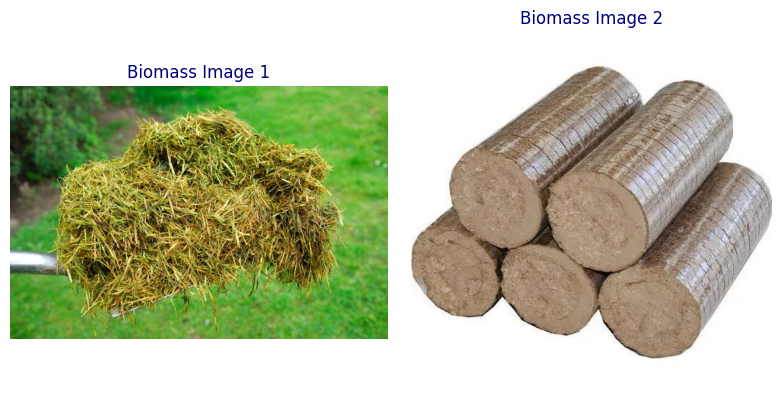

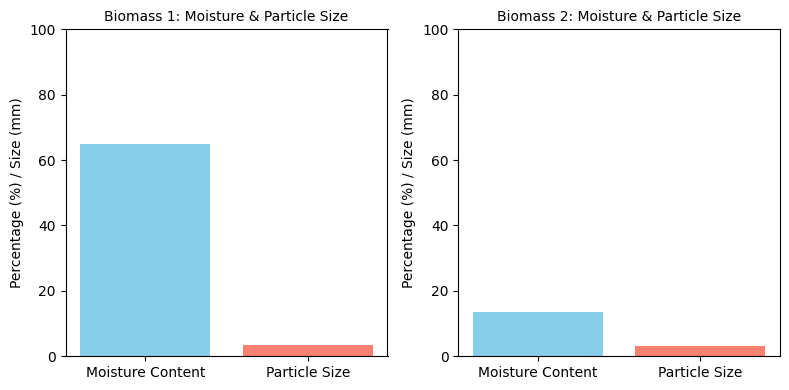

Biomass Energy Potential Analysis


--- Biomass Image 1 ---
Moisture Content: 64.87%
Moisture Content Status: Not Suitable
Average Particle Size: 3.42 mm
Particle Size Status: Suitable
Energy Potential: 526.95 MJ
Conclusion: This biomass is not suitable for energy extraction.

--- Biomass Image 2 ---
Moisture Content: 13.41%
Moisture Content Status: Suitable
Average Particle Size: 3.28 mm
Particle Size Status: Suitable
Energy Potential: 1298.85 MJ
Conclusion: This biomass is suitable for energy extraction.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

class BiomassAnalyzer:
    def __init__(self):
        self.moisture_threshold = 30  # Moisture threshold (%)
        self.size_threshold = 50     # Size threshold (mm)

        # Load pre-trained VGG16 model (only the convolutional base)
        base_model = VGG16(weights='imagenet', include_top=False)
        self.model = Model(inputs=base_model.input, outputs=base_model.output)

    def analyze_moisture(self, image_path):
        try:
            img = cv2.imread(image_path)
            if img is None:
                raise ValueError("Invalid image path or file.")
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # Extract color features for moisture estimation
            saturation = np.mean(hsv[:, :, 1])
            moisture_estimate = (saturation / 255) * 100

            return {
                'moisture_content': round(moisture_estimate, 2),
                'is_suitable': moisture_estimate < self.moisture_threshold
            }
        except Exception as e:
            return {'error': str(e)}

    def analyze_size(self, image_path):
        try:
            img = cv2.imread(image_path)
            if img is None:
                raise ValueError("Invalid image path or file.")
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Simple edge detection
            edges = cv2.Canny(gray, 50, 150)
            contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Calculate average particle size
            sizes = [np.sqrt(cv2.contourArea(contour)) for contour in contours if cv2.contourArea(contour) > 0]
            avg_size = np.mean(sizes) if sizes else 0

            return {
                'average_size_mm': round(avg_size, 2),
                'is_suitable': avg_size < self.size_threshold
            }
        except Exception as e:
            return {'error': str(e)}

    def get_energy_potential(self, moisture_content, mass_kg):
        try:
            base_energy = 15  # MJ/kg for dry biomass
            moisture_factor = 1 - (moisture_content / 100)
            return round(base_energy * moisture_factor * mass_kg, 2)
        except Exception as e:
            return {'error': str(e)}

    def predict_biomass_type(self, image_path):
        try:
            img = image.load_img(image_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            features = self.model.predict(img_array)
            return features
        except Exception as e:
            return {'error': str(e)}

# Usage example
if __name__ == "__main__":
    analyzer = BiomassAnalyzer()

    sample_image1 = "biomass.jpg"
    sample_image2 = "unsuitable.jpg"

    # Analyzing the first image
    moisture_data1 = analyzer.analyze_moisture(sample_image1)
    size_data1 = analyzer.analyze_size(sample_image1)

    # Analyzing the second image
    moisture_data2 = analyzer.analyze_moisture(sample_image2)
    size_data2 = analyzer.analyze_size(sample_image2)

    moisture_content1 = moisture_data1.get('moisture_content', 0)
    particle_size1 = size_data1.get('average_size_mm', 0)

    moisture_content2 = moisture_data2.get('moisture_content', 0)
    particle_size2 = size_data2.get('average_size_mm', 0)

    # Energy potential for both images
    energy_potential1 = analyzer.get_energy_potential(moisture_content1, mass_kg=100)
    energy_potential2 = analyzer.get_energy_potential(moisture_content2, mass_kg=100)

    # Checking suitability
    suitable_moisture1 = moisture_data1.get('is_suitable', False)
    suitable_size1 = size_data1.get('is_suitable', False)

    suitable_moisture2 = moisture_data2.get('is_suitable', False)
    suitable_size2 = size_data2.get('is_suitable', False)

    # Display the images side-by-side with smaller size
    img1 = cv2.imread(sample_image1)
    img2 = cv2.imread(sample_image2)

    img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 4))  # Smaller size for image display
    plt.subplot(1, 2, 1)
    plt.imshow(img1_rgb)
    plt.axis('off')
    plt.title("Biomass Image 1", fontsize=12, color='navy')

    plt.subplot(1, 2, 2)
    plt.imshow(img2_rgb)
    plt.axis('off')
    plt.title("Biomass Image 2", fontsize=12, color='navy')

    plt.tight_layout()
    plt.show()

    # Visualization with smaller graphs
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Smaller graph size

    # First image moisture and particle size
    axes[0].bar(['Moisture Content'], [moisture_content1], color='skyblue')
    axes[0].bar(['Particle Size'], [particle_size1], color='salmon')
    axes[0].set_ylim([0, 100])
    axes[0].set_title("Biomass 1: Moisture & Particle Size", fontsize=10)
    axes[0].set_ylabel('Percentage (%) / Size (mm)')

    # Second image moisture and particle size
    axes[1].bar(['Moisture Content'], [moisture_content2], color='skyblue')
    axes[1].bar(['Particle Size'], [particle_size2], color='salmon')
    axes[1].set_ylim([0, 100])
    axes[1].set_title("Biomass 2: Moisture & Particle Size", fontsize=10)
    axes[1].set_ylabel('Percentage (%) / Size (mm)')

    plt.tight_layout()
    plt.show()

    # Displaying results
    print("\033[1;32;40mBiomass Energy Potential Analysis\033[0m\n")

    # Display Results for Image 1
    print(f"\n\033[1;34;40m--- Biomass Image 1 ---\033[0m")
    print(f"Moisture Content: {moisture_content1}%")
    print(f"Moisture Content Status: {'Suitable' if suitable_moisture1 else 'Not Suitable'}")
    print(f"Average Particle Size: {particle_size1} mm")
    print(f"Particle Size Status: {'Suitable' if suitable_size1 else 'Not Suitable'}")
    print(f"Energy Potential: {energy_potential1} MJ")
    print("\033[1;32;40mConclusion: This biomass is suitable for energy extraction.\033[0m" if suitable_moisture1 and suitable_size1 else "\033[1;31;40mConclusion: This biomass is not suitable for energy extraction.\033[0m")

    # Display Results for Image 2
    print(f"\n\033[1;34;40m--- Biomass Image 2 ---\033[0m")
    print(f"Moisture Content: {moisture_content2}%")
    print(f"Moisture Content Status: {'Suitable' if suitable_moisture2 else 'Not Suitable'}")
    print(f"Average Particle Size: {particle_size2} mm")
    print(f"Particle Size Status: {'Suitable' if suitable_size2 else 'Not Suitable'}")
    print(f"Energy Potential: {energy_potential2} MJ")
    print("\033[1;32;40mConclusion: This biomass is suitable for energy extraction.\033[0m" if suitable_moisture2 and suitable_size2 else "\033[1;31;40mConclusion: This biomass is not suitable for energy extraction.\033[0m")
